In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

Set up the dataset

In [23]:
class PlayingCardDataset(Dataset):

    def __init__(self, data_dir, transform = None):
        self.data = ImageFolder(data_dir, transform = transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [24]:
train_data_dir = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train"
train_dataset = PlayingCardDataset(data_dir = train_data_dir)

test_data_dir = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test"
test_dataset = PlayingCardDataset(data_dir = test_data_dir)

In [25]:
print(len(train_dataset))
print(len(test_dataset))

7624
265


In [26]:
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

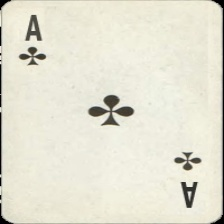

0


In [27]:
image, label = train_dataset[100]

display(image)

print(label)

In [28]:
target_to_class = {v : k for k, v in ImageFolder(train_data_dir).class_to_idx.items()}
print(ImageFolder(train_data_dir).class_to_idx.items())

dict_items([('ace of clubs', 0), ('ace of diamonds', 1), ('ace of hearts', 2), ('ace of spades', 3), ('eight of clubs', 4), ('eight of diamonds', 5), ('eight of hearts', 6), ('eight of spades', 7), ('five of clubs', 8), ('five of diamonds', 9), ('five of hearts', 10), ('five of spades', 11), ('four of clubs', 12), ('four of diamonds', 13), ('four of hearts', 14), ('four of spades', 15), ('jack of clubs', 16), ('jack of diamonds', 17), ('jack of hearts', 18), ('jack of spades', 19), ('joker', 20), ('king of clubs', 21), ('king of diamonds', 22), ('king of hearts', 23), ('king of spades', 24), ('nine of clubs', 25), ('nine of diamonds', 26), ('nine of hearts', 27), ('nine of spades', 28), ('queen of clubs', 29), ('queen of diamonds', 30), ('queen of hearts', 31), ('queen of spades', 32), ('seven of clubs', 33), ('seven of diamonds', 34), ('seven of hearts', 35), ('seven of spades', 36), ('six of clubs', 37), ('six of diamonds', 38), ('six of hearts', 39), ('six of spades', 40), ('ten of 

In [29]:
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

Transform to make sure all images in the dataset are of the same size and converted to a tensor

In [30]:
transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
transform

Compose(
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)

Recreate dataset with transform added

In [31]:
train_data_dir = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train"
train_dataset = PlayingCardDataset(data_dir = train_data_dir, transform = transform)

test_data_dir = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test"
test_dataset = PlayingCardDataset(data_dir = test_data_dir, transform = transform)

In [32]:
image, label = train_dataset[100]

print(image)
print(image.shape)

tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
         [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
         ...,
         [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
         [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
         [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
         ...,
         [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
         [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
         [0.0118, 0.0196, 0.3137,  ..., 0.2196, 0.0235, 0.

In [33]:
train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle = True)

In [34]:
class SimpleCardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifier, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # 128x128 -> 128x128
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 128x128 -> 64x64

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # 64x64
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 64x64 -> 32x32

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 32x32 -> 16x16
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        return self.classifier(x)



In [35]:
model = SimpleCardClassifier(num_classes = 53)
model

SimpleCardClassifier(
  (cnn): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=53, bias=True)
  )
)

In [36]:
images, labels = next(iter(train_dataloader))
images.shape

torch.Size([8, 3, 128, 128])

In [37]:
pred = model(images)
print(pred.shape)
print(pred[0, :])
print(sum(pred[0, :]))

torch.Size([8, 53])
tensor([-0.0690, -0.0642, -0.0533,  0.0348,  0.0061,  0.0112,  0.0337,  0.0001,
        -0.0383,  0.0407,  0.0154, -0.0210,  0.0396, -0.0171,  0.0518, -0.0334,
         0.0092, -0.0363,  0.0486,  0.0270, -0.0702, -0.0263, -0.0610,  0.0569,
        -0.0281, -0.0284,  0.0128, -0.0605, -0.0523, -0.0490,  0.0222,  0.0242,
         0.0065,  0.0215,  0.0221, -0.0598,  0.0400,  0.0187,  0.0449,  0.0270,
        -0.0258, -0.0461, -0.0175,  0.0462,  0.0080,  0.0213,  0.0018, -0.0032,
        -0.0019,  0.0287,  0.0004,  0.0262,  0.0258], grad_fn=<SliceBackward0>)
tensor(-0.0892, grad_fn=<AddBackward0>)


In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001) # can have an lr scheduler

In [39]:
criterion(pred, labels)

tensor(3.9678, grad_fn=<NllLossBackward0>)

In [40]:
train_folder = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/train"
valid_folder = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/valid"
test_folder = "/Users/takisangelides/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2/test"

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [41]:
num_epochs = 5
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc = 'Training loop'):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc = 'Validation loop'):
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch + 1}/{num_epochs} - Train loss : {train_loss}, Valid loss : {val_loss}')
    

Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss : 2.7415748633217585, Valid loss : 1.5580979828564625


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]